In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras_vggface
!pip install keras_applications
!pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
#from keras_vggface.utils import preprocess_input
#from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
import numpy as np
import cv2
import os
from scipy import spatial
import tensorflow as tf


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import csv
import pandas as pd
import keras

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/dlsip_and_maths/mtcnned/final.csv')
df = df.iloc[: , 1:]
X = df.drop(['Target'],axis=1).values   # independant features
y = df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

In [ ]:
df.shape

(6176, 2623)

In [ ]:
X_train.shape

(4940, 2622)

Fully connected layers to predict similarity


*Creating model*


In [ ]:

model_fnn = Sequential([Dense(3000, activation='relu', input_shape=(2622,)),
  Dense(4000, activation='relu'),
  Dense(4000, activation='relu'),
  Dense(1, activation='sigmoid'),])



In [ ]:
model_fnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:
hist = model_fnn.fit(X_train, y_train,
        batch_size=32, epochs=20,
        validation_data=(X_test, y_test))


Epoch 1/20
155/155 [==============================] - 7s 11ms/step - loss: 0.5124 - accuracy: 0.7447 - val_loss: 0.4655 - val_accuracy: 0.7832
Epoch 2/20
155/155 [==============================] - 2s 11ms/step - loss: 0.4295 - accuracy: 0.7994 - val_loss: 0.4157 - val_accuracy: 0.7961
Epoch 3/20
155/155 [==============================] - 2s 11ms/step - loss: 0.3721 - accuracy: 0.8340 - val_loss: 0.3391 - val_accuracy: 0.8479
Epoch 4/20
155/155 [==============================] - 2s 11ms/step - loss: 0.3171 - accuracy: 0.8597 - val_loss: 0.2782 - val_accuracy: 0.8738
Epoch 5/20
155/155 [==============================] - 1s 10ms/step - loss: 0.2784 - accuracy: 0.8767 - val_loss: 0.2891 - val_accuracy: 0.8657
Epoch 6/20
155/155 [==============================] - 1s 10ms/step - loss: 0.2500 - accuracy: 0.8939 - val_loss: 0.2247 - val_accuracy: 0.9078
Epoch 7/20
155/155 [==============================] - 1s 10ms/step - loss: 0.2108 - accuracy: 0.9081 - val_loss: 0.2864 - val_accuracy: 0.8544

In [ ]:
model_fnn.evaluate(X_test, y_test)[1]

20/20 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9693


0.9692556858062744

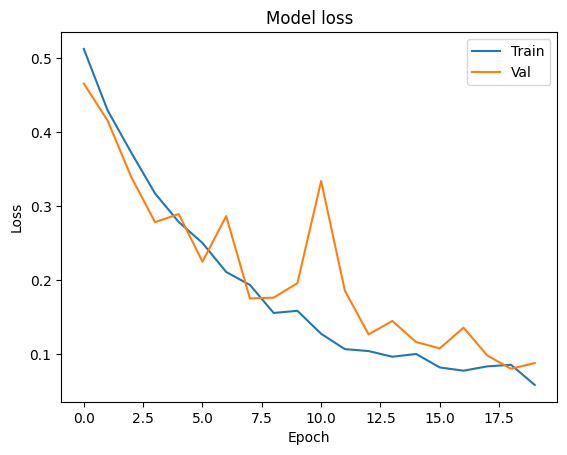

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

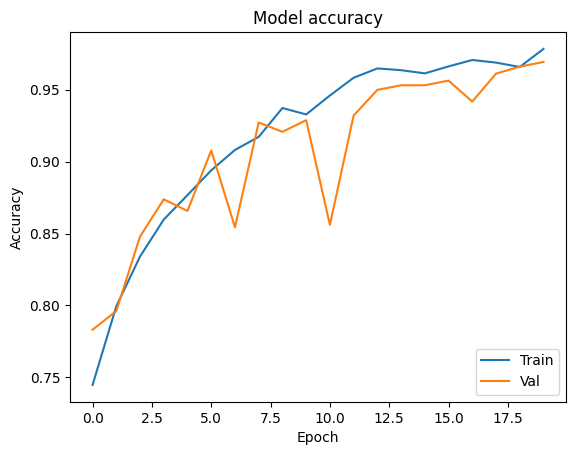

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
import cv2
import sys

def mtcnn(file_path,foldername='faces',reference=False):
  image = cv2.imread(file_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = faceCascade.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=3,minSize=(30, 30) )
  print("[INFO] Found {0} Faces.".format(len(faces)))
  if reference == True:
    dir='/content/reference'
  else:
    dir='/content/faces/'+foldername
  for f in os.listdir(dir):
    if not(f=='.ipynb_checkpoints'):
      os.remove(os.path.join(dir, f))
  if reference == True:
    (x,y,w,h)=faces[0]
    roi_color = image[y:y + h, x:x + w]
    path='/content/reference/face_of_the_person.jpg'
    cv2.imwrite(path, roi_color)
    print("file saved at",path)
  else:
    i=1

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_color = image[y:y + h, x:x + w]
        print("[INFO] Object found. Saving locally.")

        cv2.imwrite('/content/faces/'+foldername+'/detected_faces'+str(i)+'.jpg', roi_color)
        i=i+1

  status = cv2.imwrite('/content/faces_on_original_image/faces_detected.jpg', image)
  print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

In [ ]:
BASE_MODEL = 'vgg16'
include_top = 'False'
pooling = 'avg'

model=VGGFace(model=BASE_MODEL,include_top=include_top,weights='vggface',input_shape=(224,224,3),pooling=pooling)
print(model)

580070376/580070376 [==============================] - 28s 0us/step


In [ ]:
os.mkdir('reference')
!rm -rf faces
os.mkdir('faces')
os.mkdir('faces_on_original_image')

In [ ]:
def get_image_embedding(saving_dir):
  print(f"Saving DIr : {saving_dir}")
  img=Image.open(saving_dir)
  img=img.resize((224,224))
  img_array=np.array(img).astype(np.float32)
  #img_array = img_array.transpose((2,0,1))
  expanded_img=np.expand_dims(img_array,axis=0)
  result=model.predict(expanded_img)
  return result.flatten()

In [ ]:
def triplet_loss(e1,e2):
  #finds the difference between features of the each image
  distance=np.subtract(e1,e2)
  #the loss is squared so that non similar values stay more apart
  loss=np.square(distance)
  return loss


In [ ]:

def remove_files_in_directory(directory):
    os.system(f"rm -rf {directory}")

In [ ]:
!rm -rf temp_data
!rm -rf /content/faces/
!mkdir -p temp_data/ref/
!mkdir -p temp_data/group/

In [ ]:
def maincode():

  pno= "ref"
  imagePath='/content/temp_data/ref/'+str(pno)+'.jpg'
  print(imagePath)

  mtcnn(imagePath,'reference',reference=True)
  saving_dir='/content/reference/face_of_the_person.jpg'

  #select the folder of images
  fno= "group"
  path_of_the_directory='/content/temp_data/group/'
  folder_output=[]
  referenceorg=get_image_embedding(saving_dir)
  features=['f'+str(i) for i in range(2622)]
  os.makedirs('/content/faces',exist_ok=True)
  dir='/content/faces/'
  for f in os.listdir(dir):
    if not(f=='.ipynb_checkpoints'):
      os.remove(os.path.join(dir, f))
  for filename in os.listdir(path_of_the_directory):

    os.makedirs('/content/faces/'+filename,exist_ok=True)

    file=os.path.join(path_of_the_directory,filename)
    if os.path.isfile(file):
      mtcnn(file,filename,reference=False)
    all_similirity_scores=[]
    for im in os.listdir('/content/faces/'+filename):
      j=os.path.join('/content/faces/'+filename,im)
      print(j)
      if os.path.isfile(j):
        embb=get_image_embedding(j)
        dist=triplet_loss(referenceorg,embb)
        inp=pd.DataFrame([dist], columns=features)
        score=model_fnn.predict(inp)
        all_similirity_scores.append(score)

    folder_output.append([filename,max(all_similirity_scores)])

    print(all_similirity_scores)
    # removing files
  remove_files_in_directory("/content/faces/")
  if max(all_similirity_scores) >= 0.6:
    return {"Person detected in the group image":1.0}
  elif 0.4 <=max(all_similirity_scores)<0.6:
    return {"Person might be present in group image":0.5}
  else:
    return {"Person is not present in group photo":0.0}

In [ ]:
# while(1):
#   print(maincode())
#   if not(int(input('enter 0 to quit'))):
#     break
#x=maincode()

In [ ]:
#vec=get_image_embedding('/content/reference/face_of_the_person.jpg')
#print('no.of features form each image: ',len(vec))

In [ ]:
#vec

In [ ]:
#!pip install streamlit

In [ ]:
#!pip install pyngrok

In [ ]:
# %%writefile app.py
# import streamlit as st
# st.title("Identify person in group image")

In [ ]:
# !streamlit run app.py &>/dev/null&

In [ ]:
# !ngrok authtoken 2QqU0fYvIvK4CPc0ScNsrlTooVC_6EuW9N7n1nzrYgSrUZMXW

In [ ]:
# !wget  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:

# !unzip ngrok-stable-linux-amd64.zip

In [ ]:
# get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys,json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
!pip install gradio >> /dev/null

In [ ]:
from PIL import Image

def save_img(image_ref, image_group):
    # Save the reference image
    reference_path = "/content/temp_data/ref/ref.jpg"
    img_ref = Image.fromarray(image_ref)
    img_ref.save(reference_path)

    # Save the group image
    group_path = "/content/temp_data/group/group.jpg"
    img_g = Image.fromarray(image_group)
    img_g.save(group_path)
    res = maincode()
    remove_files_in_directory("/content/faces/")
    return res

import gradio as gr
image_ref = gr.inputs.Image(source="webcam", tool="opencv")
image_group = gr.inputs.Image()
label=gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=save_img, inputs=[image_ref,image_group], outputs=label, capture_session=True).launch(debug="True")
# gr.Interface(fn=save_img, inputs=[], outputs=label0, capture_session=True).launch(debug="True")


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)
<ipython-input-41-2263b77840ce>:22: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  gr.Interface(fn=save_img, inputs=[image_ref,image_group]

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/content/temp_data/ref/ref.jpg
[INFO] Found 1 Faces.
file saved at /content/reference/face_of_the_person.jpg
[INFO] Image faces_detected.jpg written to filesystem:  True
Saving DIr : /content/reference/face_of_the_person.jpg
1/1 [==============================] - 0s 19ms/step
[INFO] Found 3 Faces.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True
/content/faces/group.jpg/detected_faces2.jpg
Saving DIr : /content/faces/group.jpg/detected_faces2.jpg
1/1 [==============================] - 0s 17ms/step
/content/faces/group.jpg/detected_faces3.jpg
Saving DIr : /content/faces/group.jpg/detected_faces3.jpg
1/1 [==============================] - 0s 18ms/step
/content/faces/group.jpg/detected_faces1.jpg
Saving DIr : /content/faces/group.jpg/detected_faces1.jpg
1/1 [==============================] - 0s 17ms/step
[array([[0.9997167]], dtype=float32), array([[1.2486282e-12]], d

In [ ]:
# import cv2
# import gradio as gr
# from PIL import Image

# def save_img(image_ref, image_group):
#     # Save the reference image
#     reference_path = "/content/temp_data/ref/ref.jpg"
#     img_ref = Image.fromarray(image_ref)
#     img_ref.save(reference_path)

#     # Save the group image
#     group_path = "/content/temp_data/group/group.jpg"
#     img_g = Image.fromarray(image_group)
#     img_g.save(group_path)

#     res = maincode()
#     remove_files_in_directory("/content/faces/")
#     return res

# def capture_frames():
#     capture = cv2.VideoCapture(0)
#     while True:
#         ret, frame = capture.read()
#         if not ret:
#             continue

#         image_ref = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image_group = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         save_img(image_ref, image_group)

#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     capture.release()
#     cv2.destroyAllWindows()

# # Define the input and output interfaces for Gradio
# image_ref = gr.inputs.Image(shape=(None, None, 3), source="webcam", tool="opencv")
# image_group = gr.inputs.Image(shape=(None, None, 3), source="webcam", tool="opencv")
# label = gr.outputs.Label(num_top_classes=3)

# # Create the Gradio interface
# gr.Interface(fn=save_img, inputs=[image_ref, image_group], outputs=label, capture_session=True).launch()

# capture_frames()


In [ ]:
# import cv2
# import gradio as gr
# from PIL import Image

# def save_img(image_ref, image_group=None):
#     # Save the reference image
#     reference_path = "/content/temp_data/ref/ref.jpg"
#     img_ref = Image.fromarray(image_ref)
#     img_ref.save(reference_path)

#     res = maincode()
#     remove_files_in_directory("/content/faces/")
#     return res

# def capture_frames():
#     capture = cv2.VideoCapture(0)
#     ret, frame = capture.read()
#     if not ret:
#         print("Failed to capture frame from webcam")
#         return

#     image_ref = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     save_img(image_ref)

#     capture.release()

# # Define the input and output interfaces for Gradio
# image_ref = gr.inputs.Image(shape=(None, None, 3), source="webcam", tool="opencv")
# image_group = gr.inputs.Image()
# label = gr.outputs.Label(num_top_classes=3)

# # Create the Gradio interface
# gr.Interface(fn=save_img, inputs=[image_ref,image_group], outputs=label, capture_session=True).launch()

# capture_frames()

# image_group = gr.inputs.Image()
# label=gr.outputs.Label(num_top_classes=3)

# gr.Interface(fn=save_img, inputs=[image_ref,image_group], outputs=label, capture_session=True).launch(debug="True")